# FLOW CHART OF HOW WE THINK TO PROCEDE

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pygraphviz as pgv
from IPython.display import Image

In [2]:
df = pd.read_csv('./Project datasets-20230327/flight_dataset.csv', index_col=0)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# INITIAL FLOW CHART

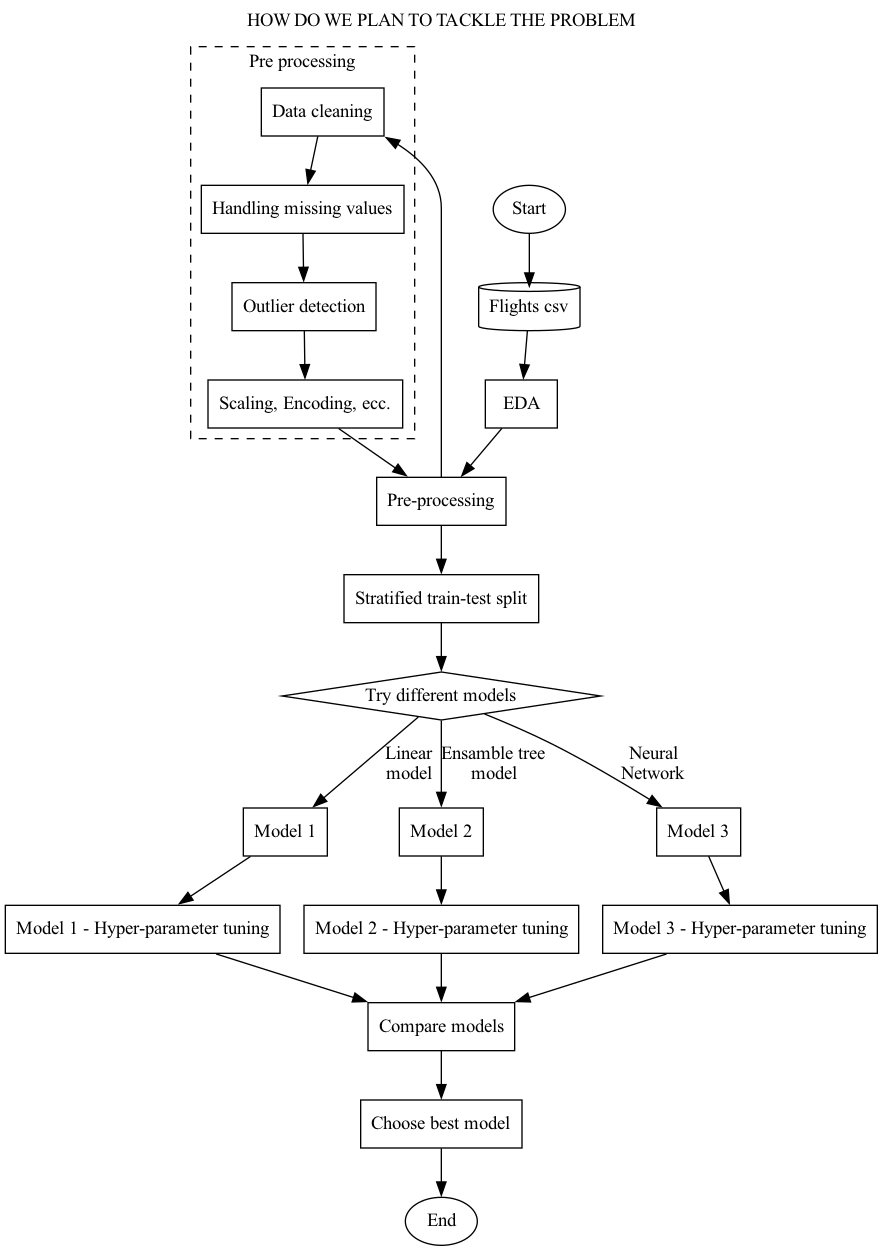

In [3]:
# Create a new graph
G = pgv.AGraph(directed=True)

# Add nodes to the graph
G.add_node('Start', shape='ellipse')
G.add_node('Flights csv', shape='cylinder')
G.add_node('EDA', shape='box')
G.add_node('Pre-processing', shape='box')
G.add_node('Stratified train-test split', shape='box')
G.add_node('Try different models', shape='diamond')
G.add_node('Model 1', shape='box')
G.add_node('Model 2', shape='box')
G.add_node('Model 3', shape='box')
G.add_node('Model 1 - Hyper-parameter tuning', shape='box')
G.add_node('Model 2 - Hyper-parameter tuning', shape='box')
G.add_node('Model 3 - Hyper-parameter tuning', shape='box')
G.add_node('Compare models', shape='box')
G.add_node('Choose best model', shape='box')
G.add_node('End', shape='ellipse')

# Add edges between nodes
G.add_edge('Start', 'Flights csv')
G.add_edge('Flights csv', 'EDA')
G.add_edge('EDA', 'Pre-processing')
G.add_edge('Pre-processing', 'Stratified train-test split')
G.add_edge('Stratified train-test split', 'Try different models')
G.add_edge('Try different models', 'Model 1', label='Linear\nmodel')
#G.edge_attr['labeljust'] = 'l'#, labelloc='l' doesn't seem to work
G.add_edge('Try different models', 'Model 2', label='Ensamble tree\nmodel')
G.add_edge('Try different models', 'Model 3', label='Neural\nNetwork')
G.add_edge('Model 1', 'Model 1 - Hyper-parameter tuning')
G.add_edge('Model 2', 'Model 2 - Hyper-parameter tuning')
G.add_edge('Model 3', 'Model 3 - Hyper-parameter tuning')
G.add_edge('Model 1 - Hyper-parameter tuning', 'Compare models')
G.add_edge('Model 2 - Hyper-parameter tuning', 'Compare models')
G.add_edge('Model 3 - Hyper-parameter tuning', 'Compare models')
G.add_edge('Compare models', 'Choose best model')
G.add_edge('Choose best model', 'End')

# Create a subgraph for the subprocess
subgraph = G.add_subgraph(name='cluster_subprocess', label='Pre processing', style='dashed')
subgraph.add_node('Data cleaning', shape='box')
subgraph.add_node('Outlier detection', shape='box')
subgraph.add_node('Handling missing values', shape='box')
subgraph.add_node('Scaling, Encoding, ecc.', shape='box')

subgraph.add_edge('Data cleaning', 'Handling missing values')
subgraph.add_edge('Handling missing values', 'Outlier detection')
subgraph.add_edge('Outlier detection', 'Scaling, Encoding, ecc.')

G.add_edge('Pre-processing', 'Data cleaning', ltail='cluster_subprocess')
G.add_edge('Scaling, Encoding, ecc.', 'Pre-processing', ltail='cluster_subprocess')

# Set the title of the graph
G.graph_attr['label'] = 'HOW DO WE PLAN TO TACKLE THE PROBLEM'
G.graph_attr['labelloc'] = 't'
G.graph_attr['labeljust'] = 'c'

# Save the graph
G.draw('flights_pre_flowchart_subprocess.png', prog='dot')

# Display the graph
%matplotlib inline
Image(G.draw(format='png', prog='dot'))